# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [57]:
import sys
sys.path.append('../src')
from pyomo.environ import value as pyoval

In [58]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min

## Data Import

In [59]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [60]:
scales = TemporalScale(discretization_list=[1,24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [61]:
bigM = 10**8
smallM = 0.001

Hourly electricity prices

In [62]:
elec_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Hourly Prices Belgium.csv')
#elec_price_df = elec_price_df[elec_price_df['SettlementPoint'] == 'HB_HOUSTON']
elec_price_df = elec_price_df[['Price (EUR/MWhe)']].reset_index(drop = True)
elec_price_df = elec_price_df[:24]
elec_price_df['Price (EUR/MWhe)'] = elec_price_df['Price (EUR/MWhe)'].clip(lower=0)
elec_price_df

,Price (EUR/MWhe)
0,0.01
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.04
9,0.06


Hourly Natural Gas Prices

In [63]:
# #The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
# NG_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/23 June Belgium.csv')
# # NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
# NG_price_df = NG_price_df[['NG_Price']]
# NG_price_df = NG_price_df[:24]
# NG_price_df

#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical natural gas prices/Natural gas historical data.csv')
NG_price_df = NG_price_df[['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']]
# NG_price_df = NG_price_df[:24]
NG_price_df
NG_price_hourly = NG_price_df.reindex(NG_price_df.index.repeat(30))
NG_price_hourly = NG_price_hourly[:24]
NG_price_hourly
NG_price_hourly = pd.DataFrame(NG_price_hourly)

mean = NG_price_hourly.mean()
std = NG_price_hourly.std()


outliers = numpy.abs(NG_price_hourly - mean) > 3 * std
# Prune outliers beyond 3 standard deviations
NG_price_hourly = NG_price_hourly.mask(outliers)
fill_value = NG_price_hourly.mean()
NG_price_hourly = NG_price_hourly.fillna(fill_value)
NG_price_hourly


,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39


In [64]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
Demand_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/Belgium_H2_Demand_2024.csv')
# NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
Demand_df = Demand_df[['Hydrogen_Demand_kg_per_day']]
Demand_df = Demand_df[:1].reset_index(drop = True)
Demand_df

,Hydrogen_Demand_kg_per_day
0,374133.83


In [65]:
# Demand_df.plot()

In [66]:
# #The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
# Demand_df = pd.read_csv('RT 06 JUNE.csv')
# # NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
# Demand_df = Demand_df[['demand']]
# Demand_df = Demand_df[:24]
# Demand_df

In [67]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
GWP_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Carbon Intensity Belgium.csv')
# NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
GWP_df = GWP_df[['Carbon intensity Full']]
GWP_df = GWP_df[:24].reset_index(drop = True)
GWP_df

,Carbon intensity Full
0,94.01
1,96.43
2,97.57
3,95.23
4,95.28
5,101.26
6,104.19
7,106.10
8,100.85
9,98.19


In [68]:
#Gives relevancy to price values again
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]
GWP_value = GWP_df.max()[0]
#Demand_value = Demand_df.max()[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_29580\2629842020.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_price = elec_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_29580\2629842020.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NG_price = NG_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_29580\2629842020.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  GWP_valu

Hourly Wind availability

In [69]:
Wind_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Wind Flanders.csv')
Wind_df = Wind_df[['Wind_avg_MW']]
Wind_df = Wind_df[:24]
Wind_df

,Wind_avg_MW
0,0.64625
1,0.64125
2,0.63250
3,0.65000
4,0.64750
5,0.65000
6,0.64250
7,0.59125
8,0.58875
9,0.53750


Hourly Solar availability

In [70]:
# import pandas as pd

# # Step 1: Load the CSV (adjust delimiter if needed)
# df = pd.read_csv("C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Wind Belgium.csv", delimiter=";")

# # Step 2: Check the column names to locate region + datetime
# print("Columns:", df.columns)

In [71]:
# import pandas as pd

# # Step 1: Load the CSV (adjust delimiter if needed)
# df = pd.read_csv("C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Wind Belgium.csv", delimiter=";")

# # Step 2: Check the column names to locate region + datetime
# print("Columns:", df.columns)

# # Example: your file may have columns like:
# # ['Datetime', 'Region', 'Technology', 'Production [MW]']

# # Step 3: Convert datetime (with UTC to suppress warning)
# datetime_col = 'Datetime'  # adjust if your file shows a different name
# df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce', utc=True)

# # Step 4: Drop rows with missing datetime
# df = df.dropna(subset=[datetime_col])

# # Step 5: Filter only Flanders rows
# # Adjust column name if it's not exactly 'Region'
# df_flanders = df[df['Region'].str.lower() == 'flanders']

# # Step 6: Floor datetime to the hour
# df_flanders['hour'] = df_flanders[datetime_col].dt.floor('H')

# # Step 7: Aggregate to hourly average
# # Adjust the production column name if it's different (like 'Production [MW]')
# df_hourly = df_flanders.groupby('hour')["Load factor"].mean().reset_index()
# df_hourly.columns = ['datetime', 'Wind_avg_MW']

# # Step 8: Save to CSV
# df_hourly.to_csv("wind_hourly_avg_MW_flanders.csv", index=False)

In [72]:
Solar_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/ESCAPE/Belgium Data/2024 Solar Flanders.csv')
Solar_df = Solar_df[['solar_avg_MW']]
Solar_df = Solar_df[:24]
Solar_df



,solar_avg_MW
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000
5,0.00000
6,0.00000
7,0.00000
8,1.15675
9,6.77200


In [73]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 62.83, gwp=0, scope=Scope.TWO)
#52.69 USD/MWH

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 72.00 , gwp=0, scope=Scope.TWO)
#60.11 USD/MWH

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

# GridPower = Resource(name='GridPower', basis='MW',
#                      cons_max=bigM, label='Power bought', gwp=420.62, price = ecombined, varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', gwp= GWP_value, price =elec_price ,varying = [VaryingResource.DETERMINISTIC_PRICE, VaryingResource.DETERMINISTIC_GWP], scope = Scope.TWO)

#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1, scope = Scope.ONE)

CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
               label='Carbon dioxide from air', block='Resource', cons_max=bigM)

CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
               label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True, scope = Scope.ONE)

CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

#CO2_Blowdown= Resource(name='CO2 Blowdown', basis='kg/hr', sell=True, block='Resource', gwp = 1) # 2 ATR processes, imp, Stream X+20, 16+20 Declares CO2 going into the Boiler via Air stream 5 in ATR process

CH4 = Resource(name='CH4', basis='kg/hr',
               label='Methane', block='Resource')

CH4_Desorped = Resource(name='CH4_Desorped', basis='kg/hr', sell=True,
               label='Methane', block='Resource') # True for ATR Occurs during ATR process

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', gwp = 0.960979, price = NG_price/20, varying = [VaryingResource.DETERMINISTIC_PRICE]) #, varying = [VaryingResource.DETERMINISTIC_PRICE])

#NG_price_hourly
# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')
#, varying=[VaryingResource.DETERMINISTIC_DEMAND]
# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', cons_max=bigM, label='Water', block='Resource')

#Industrial water price is 0.002 USD/kg of water
H2OFresh = Resource(name="H2O Fresh", cons_max=bigM, price = 0.002, basis='kg/hr', label='Fresh Water', block='Resource')

H2O_Air = Resource(name='H2O from air', cons_max=bigM,
               basis='kg/hr', label='Water from air', block='Resource')

H2O_Vent = Resource(name='H2O vented from the process',
               basis='kg/hr', sell=True, label='Water vented from the process', block='Resource')


H2O_Stack = Resource(name='H2O to Stack',
               basis='kg/hr', sell= True, label='Water to Stack', block='Resource')

'''Do we need h20 vent asu and just h20 vent?'''
H2O_Vent_ASU = Resource(name='H2O Vent from ASU',
               basis='kg/hr', sell= True, label='Water vented from ASU', block='Resource') # True for ATR - Stream 17

H2O_Blowdown = Resource(name='H2O in Blowdown',
               basis='kg/hr', sell= True, label='H2O present in air - Stream 5', block='Resource') # True for ATR - Stream 20

#Industrial water price is 0.002 USD/kg of water

# Air components

N2 = Resource(name='N2', basis='kg/hr',
               label='Nitrogen', block='Resource')

N2_SMR = Resource(name='N2 from SMR', basis='kg/hr',
               label='Nitrogen from SMR', block='Resource')

N2_WGS = Resource(name='N2 from WGS', basis='kg/hr',
               label='Nitrogen from WGS', block='Resource')

N2_FG = Resource(name='N2 from FG', basis='kg/hr',
               label='Nitrogen from FG', block='Resource')

N2_Air = Resource(name='N2 from Air', basis='kg/hr', cons_max= bigM,
               label='Nitrogen from Air', block='Resource')

N2_Vent = Resource(name='N2 vented from the process', basis='kg/hr', sell= True,
               label='Nitrogen vented from the process', block='Resource')

N2Prod = Resource(name='N2 in product stream', basis='kg/hr', sell = True,
               label='Nitrogen in product stream', block='Resource')

N2_Stack = Resource(name='N2 to Stack', basis='kg/hr', sell= True,
               label='Nitrogen to stack', block='Resource')

N2_Desorped = Resource(name='N2 Desorped', basis='kg/hr', sell=True,
               label='Nitrogen in CO2 desorption stream', block='Resource') # True for ATR
N2_Vented_Stack = Resource(name='N2 in Stack', basis='kg/hr', sell = True, 
               label='Nitrogen in Stack', block='Resource') # True for ATR
N2_Blowdown = Resource(name='N2 in Blowdown', basis='kg/hr', sell = True,
               label='Nitrogen in Blowdown stream', block='Resource') # True for ATR

O2 = Resource(name='O2', basis='kg/hr',
               label='Oxygen', block='Resource')

O2_Air = Resource(name='O2 from air', basis='kg/hr',
               label='Oxygen from air', block='Resource', cons_max = bigM)

O2_Vent = Resource(name='O2 vented from the process', basis='kg/hr', sell=True,
               label='Oxygen vented from the process', block='Resource')

O2_Stack = Resource(name='O2 to Stack', basis='kg/hr', sell= True,
               label='Oxygen to Stack', block='Resource')

O2_Desorped = Resource(name='O2 Desorped', basis='kg/hr', sell = True,
               label='Oxygen in CO2 desorption stream', block='Resource') # True for ATR

O2_ASU = Resource(name='O2 vented out of ASU', basis='kg/hr', sell = True,
               label='O2 vented out of ASU', block='Resource') # True for ATR

O2_Blowdown = Resource(name='O2 in Blowdown', basis='kg/hr', sell = True,
               label='O2 in Blowdown stream', block='Resource') # True for ATR

DP1 = Resource(name='DP1', basis='kg/hr', cons_max= 750, price=10, 
               label='DP1', block='Resource') #5% deviation
DP2 = Resource(name='DP2', basis='kg/hr', cons_max= 2250, price=25, 
               label='DP2', block='Resource') #15% deviation
DP3 = Resource(name='DP3', basis='kg/hr', cons_max= 4000, price= 50, 
               label='DP3', block='Resource') #27% deviation
DP4 = Resource(name='DP4', basis='kg/hr', cons_max= 5250, price= 115, 
               label='DP4', block='Resource')

In [74]:
15000*0.35

5250.0

## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [75]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [76]:
'''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1}, prod_min=bigM, prod_max=bigM, label='Grid', basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 0.22},
             prod_max=600, prod_min=600,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')
#PV - PPA was constructed as a 10 MWh system
# capex=0.0001, fopex=0.0001, vopex=0.0001, gwp = 0.0001

WF = Process(name='WF', conversion={Wind: -1, Power: 0.4},
             prod_max=650, prod_min=650, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')
#WF  - PPA was constructed as a 30 MWh system
SMR = Process(name='SMR', conversion={Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
                                            H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, capex=0.2,
               vopex=0.38, fopex=0.06, prod_min=smallM, prod_max=bigM, label='SMR', basis='kg/hr')
#voped = 0.78
SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00139, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, CO2_Stack: -9.3713,
                                             H2O_Vent: 3.826767, CO2cpt: 8.903, CO2_Vent: 0.46856, H2O_Stack: 0.558114, N2_Stack: 22.32218, O2_Stack: 0.6203032, }, capex=0.45,
                vopex=1.01, fopex=0.1, prod_min=smallM, prod_max=bigM, label='SMRCCS', basis='kg/hr')

PEM = Process(name='PEM', conversion={Power: -0.052, H2OFresh: -9.5,
                                            H2Pure: 1}, capex=1.5, vopex=3.43, fopex=0.7, prod_min=smallM, prod_max=bigM, label='PEM', basis='kg/hr')
#https://doi.org/10.1016/j.ijhydene.2023.04.083 - Direct carbon footprint of hydrogen generation via PEM and alkaline electrolysers using various electrical energy sources and considering cell characteristics
#1.) 1.2 capex and 3.03 vopex
#2.) 0.5 capex and 1.03 vopex
#3.) 0.109 capex and  0.22454 vopex
#4.) 0.063 capex and 0.22454 vopex
#Fact check = 6.5647:PEM, 35.06640796:AWE, 0.9375:SMR, 0.9375:ATR_CCS_R, 0.9375:ATR_CCS_R_OC - Conversion issue

ATR_CCS_R = Process(name='ATR_CCS_R', conversion= {Power: -0.0025838509316770185, NG: -3.2080287, H2OFresh: -4.8123228, H2O_Air : -0.1041653, H2O_Vent_ASU : 0.0019387, H2O_Blowdown : 1.7351222, H2O_Vent : 0.5220523,
                                                   N2_Air: -12.653394, N2_Vent: 9.970844643, N2Prod: 0.002780318, N2_Vented_Stack: 2.182324573, N2_Desorped: 0.023329689, O2_Air: -3.87607534,
                                                   O2_ASU: 0.061984387, O2_Vent: 0.0647028,  CO2_Vent: 0.44956544299999995, CO2cpt: 7.733322317, H2Pure: 1}, capex=0.35,
               vopex=0.74, fopex=0.08, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R', basis='kg/hr')

#CO2_Air:-0.007711159,

# ATR_CCS_OC = Process(name='ATR_CCS_OC', conversion={Power: -0.0059130434, NG: -3.584338787, CO2_Air: -0.010770164, CO2_Vent: 0.11601384, CO2cpt: 9.192057517, N2_Air: -17.67297545, N2_Vent: 16.7175342, N2_Blowdown: 0.000797082, N2_Desorped: 0.131330546, N2Prod: 0.002780318,
#                                                     H2O_Air: -0.145487576, H2OFresh: -5.377267146, H2O_Vent_ASU: 0.003250534, H2O_Blowdown: 3.598489736, O2_Air: -6.758549377, O2_Vent: 0.10392561, H2Pure: 1}, capex=0.45,
#                vopex=0.77, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_OC', basis='kg/hr')

ATR_CCS_R_OC = Process(name='ATR_CCS_R_OC', conversion={Power: -0.002881987577, NG: -3.208028688,  CO2_Vent: 0.663744554, CO2cpt: 8.152141983, 
                                                        N2_Air: -12.56295099, N2_Vent: 11.88406435, N2_Blowdown: 0.008434949, N2_Desorped: 0.102417105, N2Prod: 0.002780318, 
                                                        H2OFresh: -4.812322829, H2O_Air: -0.103420802, H2O_Vent_ASU: 0.002310721, H2O_Blowdown: 0.004504513, O2_Air: -4.804359335, 
                                                        O2_Vent: 0.073878039, H2Pure: 1}, capex=0.35,
               vopex=0.75, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R_OC', basis='kg/hr')
#CO2_Air: -0.007656042,

AWE = Process(name='AWE', conversion={Power: -0.06, H2OFresh: -9.4635,
                                            H2Pure: 1}, capex=0.810127,vopex=3.850633, fopex=0.202532, prod_min=smallM, prod_max=bigM, label='AWE', basis='kg/hr')

D1 = Process(name="D1", conversion={DP1:-1, H2Pure:1}, capex=0, vopex=0, fopex=0, prod_min=0, prod_max=bigM, label='D1', basis='kg/hr')
D2 = Process(name="D2", conversion={DP2:-1, H2Pure:1}, capex=0, vopex=0, fopex=0, prod_min=0, prod_max=bigM, label='D2', basis='kg/hr')
D3 = Process(name="D3", conversion={DP3:-1, H2Pure:1}, capex=0, vopex=0, fopex=0, prod_min=0, prod_max=bigM, label='D3', basis='kg/hr')
D4 = Process(name="D4", conversion={DP4:-1, H2Pure:1}, capex=0, vopex=0, fopex=0, prod_min=0, prod_max=bigM, label='D4', basis='kg/hr')

## Declare Location

In [77]:
process_set = {Grid, PV, WF,SMR, SMRCCS, PEM, AWE, D1, D2, D3, D4, ATR_CCS_R, ATR_CCS_R_OC}#, SMRCCS, PEM} #Grid,PV, WF, PEM,SMRCCS, , ATR_CCS_OC, ATR_CCS_R, ATR_CCS_R_OC
# , SMR,ATR_CCS_R, ATR_CCS_R_OC
#  SMRCCS, SMR,, ATR_CCS_R, ATR_CCS_R_OC
# , ATR_CCS_R, ATR_CCS_R_OC
# , PEM, AWE, SMRCCS, SMR,

In [78]:
Belgium = Location(name='BG', processes=process_set,  price_factor={GridPower: elec_price_df, NG: NG_price_hourly}, gwp_factor={GridPower: GWP_df}, capacity_factor={PV: Solar_df, WF: Wind_df},
                   scales=scales, label='Belgium', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, gwp_scale_level =1, capacity_scale_level=1)

# demand_factor={H2Pure: Demand_df}

#capacity_factor={PV: Solar_df, WF: Wind_df},, gwp_factor={GridPower: GWP_df}

## Declare Scenario

In [79]:
# #Custom penalty tiers

# class CustomScenario(Scenario):
#     def __post_init__(self):
#         super().__post_init__()
#         # Define the dynamic penalty tiers: (lower %, upper %, €/kg)
#         self.demand_penalty_tiers = [
#             (0.00, 0.10, 50.0),
#             (0.10, 0.20, 80.0),
#             (0.20, 0.30, 120.0),
#             (0.30, 1.00, 200.0)]

# Instantiate your custom scenario
# scenario = CustomScenario(
#     name="scenario_full",
#     demand_penalty=1, network=Belgium, scales=scales,  expenditure_scale_level=0, demand_scale_level=1, 
#                     purchase_scale_level = 2, scheduling_scale_level=2, network_scale_level=0, capacity_scale_level=2, gwp_scale_level = 2, 
#                     label='full_case', demand={Belgium: {H2Pure:300000}})



scenario = Scenario(name='scenario_full', network=Belgium, scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, capacity_scale_level=1, gwp_scale_level = 1, 
                    label='full_case', demand={Belgium: {H2Pure:360000}})

#, demand_penalty={Belgium: {H2Pure: 25}}
# , demand_penalty={Belgium: {H2Pure: 7.9}}


Generating a realistic deterministic demand

In [80]:
# import numpy as np
# import pandas as pd

# # Set seed for reproducibility
# np.random.seed(42)

# # Create a date range for one year
# date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")

# # Base daily average (kg/day)
# base_demand = 360000  

# # Seasonal effect: Higher winter use for heating (residential)
# seasonal_effect = 1 + 0.2 * np.cos(2 * np.pi * (date_range.dayofyear - 15) / 365)

# # Random daily variability by sector (in percent)
# industry_variation = np.random.normal(0, 0.01, len(date_range))  # ±1%
# mobility_variation = np.random.normal(0, 0.2, len(date_range))  # ±20%
# residential_variation = np.random.normal(0, 0.07, len(date_range))  # ±7%

# # Sector shares
# industry_share = 0.6
# mobility_share = 0.3
# residential_share = 0.1

# # Compute total daily demand
# daily_demand = (
#     base_demand
#     * (
#         industry_share * (1 + industry_variation)
#         + mobility_share * (1 + mobility_variation)
#         + residential_share * (1 + residential_variation) * seasonal_effect
#     )
# )

# # Ensure no negative demand
# daily_demand = np.maximum(daily_demand, 0)

# # Create DataFrame
# hydrogen_demand_df = pd.DataFrame({
#     "Date": date_range,
#     "Hydrogen_Demand_kg_per_day": daily_demand.round(2)
# })

# # Save to CSV (optional)
# #hydrogen_demand_df.to_csv("Belgium_H2_Demand_2024.csv", index=False)

# # Display head
# hydrogen_demand_df.head()


In [81]:
# scenario.capacity_factor['HO'].keys()

In [82]:

# plot_scenario.price_factor(
#     scenario=scenario, location=Belgium, resource=GridPower, fig_size=(9, 5), color='black')


In [83]:
# plot_scenario.gwp_factor(
#     scenario=scenario, location=Belgium, resource=GridPower, fig_size=(9, 5), color='midnightblue')

In [84]:

# plot_scenario.price_factor(
#     scenario=scenario, location=Belgium, resource=NG, fig_size=(9, 5), color='blue')

In [85]:
# plot_scenario.capacity_factor(
#     scenario=scenario, location=Belgium, process=PV, fig_size=(9, 5), color='red')

In [86]:
# plot_scenario.capacity_factor(
#     scenario=scenario, location=Belgium, process=WF, fig_size=(9, 5), color='green')

In [87]:
# plot_scenario.demand_factor(
#     scenario=scenario, location=Belgium, resource=H2Pure, fig_size=(9, 5), color='green')

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [88]:
#, Constraints.MODE

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign= 'eq')
#_W_DEMAND_PENALTY
# milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.NETWORK, Constraints.PRODUCTION,
#                       Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST_W_DEMAND_PENALTY)
# #, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost


In [89]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_cost.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

In [90]:
from pyomo.environ import Var, Binary, ConstraintList


milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons2.add(expr = milp_cost.P['BG', 'SMR', *i] - milp_cost.P['BG', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['BG','SMR', i[0]])
        # milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

milp_cost.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons3.add(expr = milp_cost.P['BG', 'SMR', *i] - milp_cost.P['BG', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*milp_cost.Cap_P['BG','SMR', i[0]])

'''ATR Constraints'''

milp_cost.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons4.add(expr = milp_cost.P['BG', 'ATR_CCS_R', *i] - milp_cost.P['BG', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['BG','ATR_CCS_R', i[0]])

milp_cost.cons5 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons5.add(expr = milp_cost.P['BG', 'ATR_CCS_R', *i] - milp_cost.P['BG', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['BG','ATR_CCS_R', i[0]])


milp_cost.cons8 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons8.add(expr = milp_cost.P['BG', 'ATR_CCS_R_OC', *i] - milp_cost.P['BG', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*milp_cost.Cap_P['BG','ATR_CCS_R_OC', i[0]])

milp_cost.cons9 = ConstraintList()
for i in scales.scale_iter(2):
    if i != (0,0,0):
        milp_cost.cons9.add(expr = milp_cost.P['BG', 'ATR_CCS_R_OC', *i] - milp_cost.P['BG', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*milp_cost.Cap_P['BG','ATR_CCS_R_OC', i[0]])  

    # Minimum production rate
    # milp_cost.cons1 = ConstraintList()
    # for i in scales.scale_iter(1):
    #  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

    # Add binary variables for on/off control
# milp_cost.on_smr = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for SMR system
# milp_cost.on_atr_ccs_r = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R system
# milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_OC system
# milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(2), domain=Binary)  # Binary variable for ATR_CCS_R_OC system

milp_cost.cons10 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons10.add(expr = milp_cost.P['BG', 'SMR', *i] >= 0.3*milp_cost.Cap_P['BG','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]

milp_cost.cons11 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons11.add(expr = milp_cost.P['BG', 'ATR_CCS_R', *i] >= 0.2*milp_cost.Cap_P['BG','ATR_CCS_R', i[0]]) #20% of max production rate
    
milp_cost.cons13 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0,0):
    milp_cost.cons13.add(expr = milp_cost.P['BG', 'ATR_CCS_R_OC', *i] >= 0.2*milp_cost.Cap_P['BG','ATR_CCS_R_OC', i[0]]) #20% of max production rate

    # For SMR
milp_cost.cons14 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_smr == 0)
    milp_cost.cons14.add(expr = milp_cost.P['BG', 'SMR', *i] <=milp_cost.Cap_P['BG','SMR', i[0]])

# For ATR_CCS_R
milp_cost.cons15 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r == 0)
    milp_cost.cons15.add(expr = milp_cost.P['BG', 'ATR_CCS_R', *i] <= milp_cost.Cap_P['BG','ATR_CCS_R', i[0]])

# For ATR_CCS_R_OC
milp_cost.cons17 = ConstraintList()
for i in scales.scale_iter(2):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r_oc == 0)
    milp_cost.cons17.add(expr = milp_cost.P['BG', 'ATR_CCS_R_OC', *i] <= milp_cost.Cap_P['BG','ATR_CCS_R_OC', i[0]])


In [91]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name="res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 3912 rows, 20224 columns and 10103 nonzeros
Model fingerprint: 0x3aadb9a2
Variable types: 20211 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [6e-04, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+02, 1e+08]
Presolve removed 3491 rows and 20008 columns
Presolve time: 0.01s
Presolved: 421 rows, 216 columns, 1260 nonzeros
Variable types: 210 continuous, 6 integer (6 binary)
Found heuristic solution: objective 1674666.9971
Found heuristic solution: objective 1664538.2474

Root relaxation: objective 1.306555e+06, 16 iterations, 0.00 seconds (0.0

In [92]:
#plot_results.schedule(results = results_cost, y_axis= 'P', component = 'SMR', location='BG')

In [93]:
#plot_results.schedule(results = results_cost, y_axis= 'P', component = 'Grid', location='BG')

In [94]:
results_cost.output['objective']

1306555.2

In [95]:
results_cost.output['global_warming_potential_location']

{('BG', 0): 1861129.0285714285}

In [96]:
results_cost.output['global_warming_potential_resource']

{('BG', 'CO2 Captured', 0, 0): 0.0,
 ('BG', 'CO2 Captured', 0, 1): 0.0,
 ('BG', 'CO2 Captured', 0, 2): 0.0,
 ('BG', 'CO2 Captured', 0, 3): 0.0,
 ('BG', 'CO2 Captured', 0, 4): 0.0,
 ('BG', 'CO2 Captured', 0, 5): 0.0,
 ('BG', 'CO2 Captured', 0, 6): 0.0,
 ('BG', 'CO2 Captured', 0, 7): 0.0,
 ('BG', 'CO2 Captured', 0, 8): 0.0,
 ('BG', 'CO2 Captured', 0, 9): 0.0,
 ('BG', 'CO2 Captured', 0, 10): 0.0,
 ('BG', 'CO2 Captured', 0, 11): 0.0,
 ('BG', 'CO2 Captured', 0, 12): 0.0,
 ('BG', 'CO2 Captured', 0, 13): 0.0,
 ('BG', 'CO2 Captured', 0, 14): 0.0,
 ('BG', 'CO2 Captured', 0, 15): 0.0,
 ('BG', 'CO2 Captured', 0, 16): 0.0,
 ('BG', 'CO2 Captured', 0, 17): 0.0,
 ('BG', 'CO2 Captured', 0, 18): 0.0,
 ('BG', 'CO2 Captured', 0, 19): 0.0,
 ('BG', 'CO2 Captured', 0, 20): 0.0,
 ('BG', 'CO2 Captured', 0, 21): 0.0,
 ('BG', 'CO2 Captured', 0, 22): 0.0,
 ('BG', 'CO2 Captured', 0, 23): 0.0,
 ('BG', 'CO2 Vented from the process', 0, 0): 0.0,
 ('BG', 'CO2 Vented from the process', 0, 1): 0.0,
 ('BG', 'CO2 Vented 

In [97]:
results_cost.output['X_P']

{('BG', 'ATR_CCS_R', 0): -0.0,
 ('BG', 'ATR_CCS_R_OC', 0): -0.0,
 ('BG', 'AWE', 0): -0.0,
 ('BG', 'D1', 0): 1.0,
 ('BG', 'D2', 0): 1.0,
 ('BG', 'D3', 0): 1.0,
 ('BG', 'D4', 0): 1.0,
 ('BG', 'Grid', 0): 1.0,
 ('BG', 'PEM', 0): 1.0,
 ('BG', 'PV', 0): 1.0,
 ('BG', 'SMR', 0): -0.0,
 ('BG', 'SMRCCS', 0): -0.0,
 ('BG', 'WF', 0): 1.0}

In [98]:
milp_cost.Cap_P.pprint()

Cap_P : Process Capacity
    Size=13, Index=locations*processes*scales_network
    Key                       : Lower : Value              : Upper : Fixed : Stale : Domain
       ('BG', 'ATR_CCS_R', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
    ('BG', 'ATR_CCS_R_OC', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
             ('BG', 'AWE', 0) :     0 :                0.0 :  None : False : False : NonNegativeReals
              ('BG', 'D1', 0) :     0 :              750.0 :  None : False : False : NonNegativeReals
              ('BG', 'D2', 0) :     0 :             2250.0 :  None : False : False : NonNegativeReals
              ('BG', 'D3', 0) :     0 :             4000.0 :  None : False : False : NonNegativeReals
              ('BG', 'D4', 0) :     0 :             5250.0 :  None : False : False : NonNegativeReals
            ('BG', 'Grid', 0) :     0 :        100000000.0 :  None : False : False : NonNegativeReals
             

In [99]:
x = results_cost.output['P']

In [100]:
results_cost.output['objective']

1306555.2

## Graphing Hydrogen Production

In [101]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime, timedelta

# # Generate time labels
# time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(186,189) for i in range(24)]
# #SMRplot = [x['BG', 'SMR', day, hour] for day in range(0,1) for hour in range(24)]
# #345,348

# #plt.fill_between(time_labels, SMRplot, color= 'maroon', alpha=0.1)

# plt.plot(time_labels, [x['BG', 'SMR', 0, day, hour] for day in range(186,189) for hour in range(24)], color='maroon', label="SMR Production")
# #plt.plot(time_labels, SMRplot, color='maroon', linestyle='--', label = 'SMR')#, label = "Hydrogen production rate")

# # Labeling axes
# plt.xlabel('Time', fontsize = 14)
# plt.ylabel('Hourly Hydrogen Production [kg]', fontsize = 14)

# # Format the y-axis in scientific notation
# plt.ticklabel_format(style='sci', axis='y')  

# # Set limits for y and x axes
# plt.ylim(bottom=0)
# plt.xlim([time_labels[0], time_labels[-1]])

# # Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=8))  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y
# plt.xticks(rotation=45)
# '%b %d %H:%M'
# # Add grid
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Display legend
# plt.legend(fontsize = 10)

# # Show the plot
# plt.show()

## Graphing Grid Usage

In [102]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime, timedelta

# # Generate time labels
# time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(186,189) for i in range(24)]
# #SMRplot = [x['BG', 'Grid', day, hour] for day in range(0,1) for hour in range(24)]


# #plt.fill_between(time_labels, SMRplot, color= 'maroon', alpha=0.1)

# #plt.plot(time_labels, SMRplot, color='maroon', linestyle='--', label = 'SMR')#, label = "Hydrogen production rate")
# plt.plot(time_labels, [x['BG', 'Grid',0, day, hour] for day in range(186,189) for hour in range(24)], color='purple', label="Grid")
# plt.plot(time_labels, [x['BG', 'WF',0, day, hour] for day in range(186,189) for hour in range(24)], color='g', linestyle=':', label="WF")
# plt.plot(time_labels, [x['BG', 'PV',0, day, hour] for day in range(186,189) for hour in range(24)], color='red', linestyle='--', label="PV")

# # Labeling axes
# plt.xlabel('Time', fontsize = 14)
# plt.ylabel('Total Electricity Consumed [MWh]', fontsize = 14)

# # Format the y-axis in scientific notation
# plt.ticklabel_format(style='sci', axis='y')  

# # Set limits for y and x axes
# plt.ylim(bottom=0)
# plt.xlim([time_labels[0], time_labels[-1]])

# # Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=8))  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y
# plt.xticks(rotation=45)

# # Add grid
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Display legend
# plt.legend(fontsize = 10)

# # Show the plot
# plt.show()

## For Minimizing GWP

## For Emission Reduction Scenarios

In [103]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
from pyomo.environ import Var, Binary

def modeler(gwp_pct: float):
    gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.NETWORK,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'geq')
    gwp_eval.cons2 = ConstraintList()
    gwp_eval.cons3 = ConstraintList()
    gwp_eval.cons4 = ConstraintList()
    gwp_eval.cons5 = ConstraintList()
    gwp_eval.cons8 = ConstraintList()
    gwp_eval.cons9 = ConstraintList()
    gwp_eval.cons10 = ConstraintList()
    gwp_eval.cons11 = ConstraintList()
    gwp_eval.cons13 = ConstraintList()
    gwp_eval.cons14 = ConstraintList()
    gwp_eval.cons15 = ConstraintList()
    gwp_eval.cons17 = ConstraintList()

    for i in scales.scale_iter(2):
        gwp_eval.cons10.add(expr = gwp_eval.P['BG', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['BG','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons11.add(expr = gwp_eval.P['BG', 'ATR_CCS_R', *i] >= 0.2*gwp_eval.Cap_P['BG','ATR_CCS_R', i[0]]) #20% of max production rate
        gwp_eval.cons13.add(expr = gwp_eval.P['BG', 'ATR_CCS_R_OC', *i] >= 0.2*gwp_eval.Cap_P['BG','ATR_CCS_R_OC', i[0]]) #20% of max production rate
        gwp_eval.cons14.add(expr = gwp_eval.P['BG', 'SMR', *i] <=gwp_eval.Cap_P['BG','SMR', i[0]])
        gwp_eval.cons15.add(expr = gwp_eval.P['BG', 'ATR_CCS_R', *i] <= gwp_eval.Cap_P['BG','ATR_CCS_R', i[0]])
        gwp_eval.cons17.add(expr = gwp_eval.P['BG', 'ATR_CCS_R_OC', *i] <= gwp_eval.Cap_P['BG','ATR_CCS_R_OC', i[0]])
        if i != (0,0,0):
            gwp_eval.cons2.add(expr = gwp_eval.P['BG', 'SMR', *i] - gwp_eval.P['BG', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['BG','SMR', i[0]])
            gwp_eval.cons3.add(expr = gwp_eval.P['BG', 'SMR', *i] - gwp_eval.P['BG', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['BG','SMR', i[0]])
            gwp_eval.cons4.add(expr = gwp_eval.P['BG', 'ATR_CCS_R', *i] - gwp_eval.P['BG', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['BG','ATR_CCS_R', i[0]])
            gwp_eval.cons5.add(expr = gwp_eval.P['BG', 'ATR_CCS_R', *i] - gwp_eval.P['BG', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['BG','ATR_CCS_R', i[0]])
            gwp_eval.cons8.add(expr = gwp_eval.P['BG', 'ATR_CCS_R_OC', *i] - gwp_eval.P['BG', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['BG','ATR_CCS_R_OC', i[0]])
            gwp_eval.cons9.add(expr = gwp_eval.P['BG', 'ATR_CCS_R_OC', *i] - gwp_eval.P['BG', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['BG','ATR_CCS_R_OC', i[0]])


    constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
    return gwp_eval

In [104]:
models = [modeler((i+1)) for i in range(100)]

constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint global warming potential network reduction
constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost locatio

constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost
constraint global warming potential network reduction
constraint process capex
constraint process fopex
constraint process vopex
constraint storage capex
constraint process incidental
constraint location capex
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective

In [105]:
import os

# Create the 'res_red' directory if it doesn't exist
os.makedirs('res_red', exist_ok=True)

def solver(instance, i): 
    return solve(
        scenario=scenario, 
        instance=instance,
        solver='gurobi', 
        name=f"res_red/res_red_{i}", 
        print_solversteps=True, 
        saveformat='.pkl'
    )

# Assuming 'models' is a list of instances to be solved
results = {i: solver(m, i) for i, m in enumerate(models)}


Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Non-default parameters:
QCPDual  1

Optimize a model with 3913 rows, 20224 columns and 10104 nonzeros
Model fingerprint: 0x9463cea0
Variable types: 20211 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [6e-04, 1e+08]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+02, 1e+08]
Presolve removed 3491 rows and 19984 columns
Presolve time: 0.00s
Presolved: 422 rows, 240 columns, 1404 nonzeros
Variable types: 234 continuous, 6 integer (6 binary)
Found heuristic solution: objective 1.250206e+07
Found heuristic solution: objective 1664538.2474

Root relaxation: objective 1.311894e+06, 71 iterations, 0.00 seconds (0.0

In [106]:
for i in range(len(models)):
    print(results[i].output['termination'])

optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal


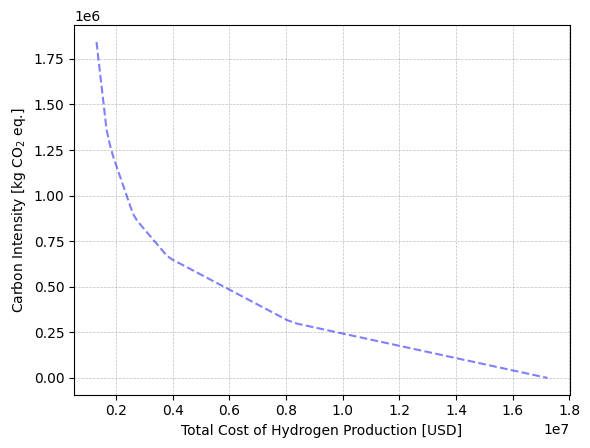

In [107]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
gwpm_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['BG', 0]
        gwpm_study[gwp_red] = result.output['global_warming_potential_material']
        prod_study[gwp_red] = result.output['P']

#print(type(gwp_study[0]))

plt.plot(cost, gwp_study, color='blue', linestyle='--', alpha=0.5)
#, linestyle='--'
plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# Mark elbow points (use either elbow_indices or elbow_point)

# gwp_study[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_30456\4145888488.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(data_sets))


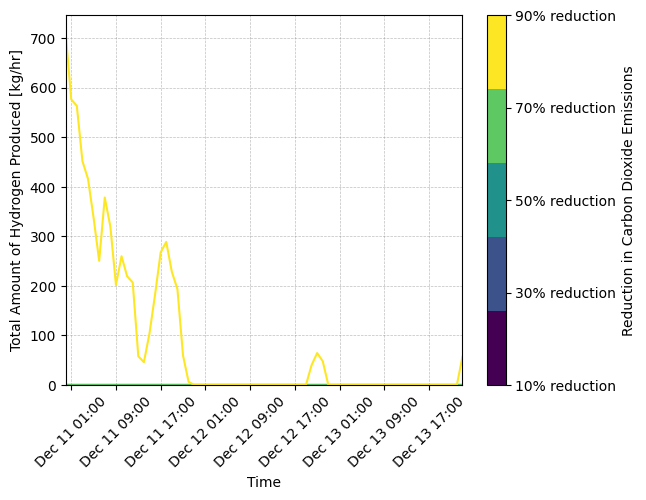

In [111]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(345,348) for i in range(24)]
# Data for plotting
data_sets = [0,2,4,6,8]  # Indices of the different datasets

# Create a colormap from red to yellowgreen
cmap = plt.cm.get_cmap('viridis', len(data_sets))
#RdYlGn
# # Plot each dataset with its corresponding color
# for i, study in enumerate(data_sets):
#     plt.plot(time_labels, 
#              [prod_study[study]['BG', 'ATR_CCS_R', 0, day, hour] for day in range (186,189) for hour in range(24)], 
#              color=cmap(i), label=f'Study {study}')
    
    # Corrected labels for emission reduction
reduction_labels = ['10% reduction','30% reduction', '50% reduction','70% reduction' ,'90% reduction']

# Plot each dataset with its corresponding color
for i, study in enumerate(data_sets):
    plt.plot(time_labels, 
             [prod_study[study]['BG', 'PEM', 0, day, hour] for day in range(345,348) for hour in range(24)], 
             color=cmap(i), label=reduction_labels[i])  # Use proper label
#186,189
# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))  # Hour:Minute format
# plt.xticks(time_labels[::3])  # Show every second hour for better spacing
plt.xticks(rotation=45)

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Create a colorbar to represent the spectrum of the studies
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(data_sets) - 1))
# sm.set_array([])  # Empty array for the colorbar
# cbar = plt.colorbar(sm, ax=plt.gca(), ticks=np.linspace(0, len(data_sets) - 1, len(data_sets)))
# cbar.set_label('Reduction in Carbon Dioxide Emissions')
# cbar.set_ticks([0, 1, 2])
# cbar.set_ticklabels([f'{study}0% reduction' for study in data_sets])

# Create a colorbar to represent the spectrum of the studies
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(data_sets) - 1))
sm.set_array([])  # Empty array for the colorbar
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=np.arange(len(data_sets)))
cbar.set_label('Reduction in Carbon Dioxide Emissions')
cbar.set_ticklabels(reduction_labels)

# Show the plot
plt.show()


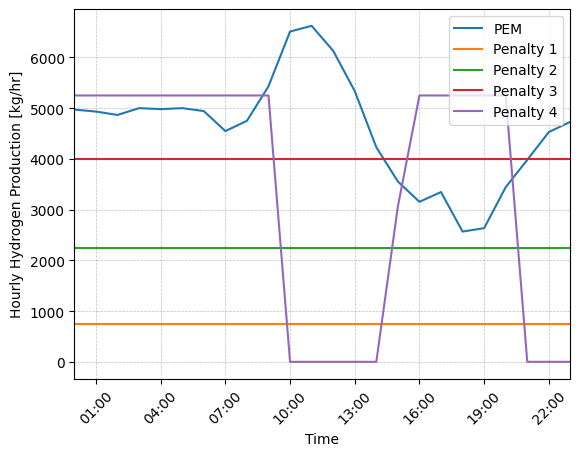

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]

# # Plotting the data

plt.plot(time_labels, [prod_study[99]['BG', 'PEM',0, hour]for hour in range(24)], label="PEM")
#plt.plot(time_labels, [prod_study[99]['BG', 'AWE',0, hour]  for hour in range(24)], label="AWE")
#plt.plot(time_labels, [prod_study[99]['BG', 'SMRCCS',0,  hour]  for hour in range(24)], label="SMRCCS")
#plt.plot(time_labels, [prod_study[99]['BG', 'SMR',0, hour] for hour in range(24)], label="SMR")
plt.plot(time_labels, [prod_study[99]['BG', 'D1',0,  hour]  for hour in range(24)], label="Penalty 1")
plt.plot(time_labels, [prod_study[99]['BG', 'D2',0,  hour]  for hour in range(24)], label="Penalty 2")
plt.plot(time_labels, [prod_study[99]['BG', 'D3',0,  hour]  for hour in range(24)], label="Penalty 3")
plt.plot(time_labels, [prod_study[99]['BG', 'D4',0, hour]  for hour in range(24)], label="Penalty 4")
#plt.plot(time_labels, [prod_study[99]['BG', 'ATR_CCS_R',0, hour] for hour in range(24)], label="ATR_CCS_R")
#plt.plot(time_labels, [prod_study[8]['BG', 'ATR_CCS_R_OC',0, day, hour] for day in range(186,189) for hour in range(24)], label="ATR_CCS_R_OC")


# plt.plot(time_labels, [prod_study[7]['HO', 'Grid', 0, day, hour] for day in range(0,365) for hour in range(24)], color='purple', label="Grid")
# plt.plot(time_labels, [prod_study[7]['HO', 'WF', 0, day, hour] for day in range(174,175) for hour in range(24)], color='g', linestyle=':', label="WF")
# plt.plot(time_labels, [prod_study[7]['HO', 'PV', 0, day, hour] for day in range(174,175) for hour in range(24)], color='red', linestyle='--', label="PV")

# Labeling axes
plt.xlabel('Time')
plt.ylabel('Hourly Hydrogen Production [kg/hr]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
#plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# # Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
# plt.xticks(time_labels[::3])  # Show every second hour for better spacing

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Show one tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y
plt.xticks(rotation=45)
# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(0,365) for i in range(24)]

# # Plotting the data


z = (time_labels,[prod_study[8]['BG', 'D3',0, day, hour] for day in range(0,365) for hour in range(24)])

In [78]:
d3_values = z[1]

In [79]:
# Extract the time and D2 values
time_list = z[0]
d3_values = z[1]

# Create a DataFrame
df = pd.DataFrame({
    'timestamp': time_list,
    'D2_production': d3_values
})

# Export to CSV
df.to_csv('d3_production_TV.csv', index=False)

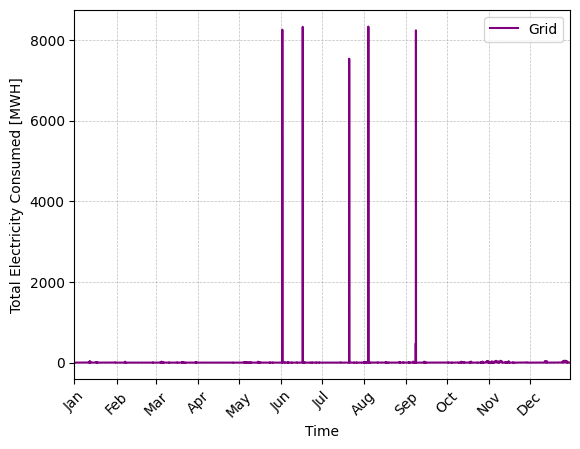

In [101]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(days=j, hours=i) for j in range(0,365) for i in range(24)]

# # Plotting the data

# plt.plot(time_labels, [prod_study[75]['BG', 'PEM', day, hour] for day in range(0,1) for hour in range(24)], label="PEM")
# plt.plot(time_labels, [prod_study[75]['BG', 'AWE', day, hour] for day in range(0,1) for hour in range(24)], label="AWE")
# plt.plot(time_labels, [prod_study[75]['BG', 'SMRCCS', day, hour] for day in range(0,1) for hour in range(24)], label="SMRCCS")
# plt.plot(time_labels, [prod_study[75]['BG', 'SMR', day, hour] for day in range(0,1) for hour in range(24)], label="SMR")
# plt.plot(time_labels, [prod_study[75]['BG', 'ATR_CCS_R', day, hour] for day in range(0,1) for hour in range(24)], label="ATR_CCS_R")
# plt.plot(time_labels, [prod_study[75]['BG', 'ATR_CCS_R_OC', day, hour] for day in range(0,1) for hour in range(24)], label="ATR_CCS_R_OC")


plt.plot(time_labels, [prod_study[7]['BG', 'Grid',0, day, hour] for day in range(0,365) for hour in range(24)], color='purple', label="Grid")
#plt.plot(time_labels, [prod_study[7]['BG', 'WF',0,  day, hour] for day in range(0,365) for hour in range(24)], color='g', linestyle=':', label="WF")
#plt.plot(time_labels, [prod_study[7]['BG', 'PV',0, day, hour] for day in range(0,365) for hour in range(24)], color='red', linestyle='--', label="PV")

# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumed [MWH]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
#plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# # Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format %D:%H:%M
# plt.xticks(time_labels[::3])  # Show every second hour for better spacing

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show one tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y
plt.xticks(rotation=45)
# Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Jan 2024', 'Feb 2024', etc.  %Y


# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

## Alternative method to do reduction in emissions

In [ ]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction

In [ ]:
def modeler(gwp_pct: float):
    instance = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

    constraint_global_warming_potential_network_reduction(instance= instance, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])

    return instance

In [ ]:
models = [modeler(i+1) for i in range(100)]

In [ ]:
def solver(instance, i): 
    return solve(scenario=scenario, instance=instance,
                     solver='gurobi', name=f"res_red/res_red_{i}", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results = {i: solver(m,i) for i,m in enumerate(models)}

In [ ]:
for i in range(len(models)):
    print(results[i].output['termination'])

In [ ]:
import pickle
with open('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/res_red/res_red_0.pkl', 'rb') as file:
    data = pickle.load(file)
    print(data)

In [ ]:
# Load the pickle file
data = pd.read_pickle('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/res_red/res_red_0.pkl')
df = pd.DataFrame(data)
selected_rows = df.loc[['objective', 'Cost', 'global_warming_potential_network']]
selected_rows.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/res_red_0.xlsx', index=True)
#df = df.T
# # Check the type of the loaded object
# print(data.keys())
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/res_red_0.xlsx', index=True)

In [ ]:
import pandas as pd
import os

# Directory paths
input_dir = 'C:/Users/marcopdsousa/Documents/energiapy/Real-Time/res_red/'
output_dir = 'C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through the 100 .pkl files
for i in range(100):
    # Generate the file name
    input_file = os.path.join(input_dir, f'res_red_{i}.pkl')
    output_file = os.path.join(output_dir, f'res_red_{i}.xlsx')
    
    # Load the pickle file
    df = pd.read_pickle(input_file)
    df = pd.DataFrame(df)
    # Select the specific rows of interest
    selected_rows = df.loc[['objective', 'Cost', 'global_warming_potential_network']]
    
    # Save the selected rows to an Excel file
    selected_rows.to_excel(output_file, index=True)
    
    print(f"Processed and saved: {output_file}")


In [ ]:
import pandas as pd
import os

# Directory containing the Excel files
input_dir = 'C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/'

# Output file path
output_file = 'C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/merged_res_red.xlsx'

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through each file in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # Construct full file path
        file_path = os.path.join(input_dir, file_name)
        
        # Load the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Optionally, add a column to identify the source file
        df['Source'] = file_name
        
        # Append the DataFrame to the list
        dfs.append(df)
        
        print(f"Loaded {file_name}")

# Concatenate all DataFrames in the list into one DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame to a single Excel file
merged_df.to_excel(output_file, index=False)

print(f"All files merged into {output_file}")


In [ ]:
# df = pd.DataFrame(data)
# df = df.T
# # Export the DataFrame to an Excel file,index=[0]
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/res_red_0.xlsx', index=True)

In [ ]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

In [ ]:
# model.component

from pyomo.environ import ConstraintList
milp_gwp.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp.cons4.add(expr = milp_gwp.P['HO', 'SMR', *i] >= 1000)

In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 5000

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

# from pyomo.environ import ConstraintList, Binary, Var


# # Define the binary variable
# milp_gwp.ramping_up = Var(scales.scale_iter(1), within=Binary)

# ramping_limit = 5000

# milp_gwp.cons2 = ConstraintList()
# milp_gwp.cons3 = ConstraintList()

# for i in scales.scale_iter(1):
#     if i != (0,0):
#         previous_i = scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]
        
#         # Ramp up constraint
#         milp_gwp.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *previous_i] <= ramping_limit)
        
#         # Ramp down constraint
#         milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *previous_i] >= -ramping_limit)
        
#         # Ensure if ramped up, cannot ramp down in the next step
#         milp_gwp.cons3.add(expr = milp_gwp.ramping_up[i] * (milp_cost.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *previous_i]) >= 0)
#         milp_gwp.cons3.add(expr = (1 - milp_gwp.ramping_up[i]) * (milp_cost.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *previous_i]) <= 0)

In [ ]:
milp_gwp.objective_gwp_min.pprint()

In [ ]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp.output['global_warming_potential_resource']

In [ ]:
results_gwp.output['global_warming_potential_location']

In [ ]:
results_gwp.output['Cost']

In [ ]:
# results_gwp.output['P_network']

In [ ]:
results_gwp.output['P']

In [ ]:
data = results_gwp.output['P']
df = pd.DataFrame(data,index=[0])
df = df.T
# Export the DataFrame to an Excel file
df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/Shell August 2024/varyingGWPprocessexpanded.xlsx', index=True)

In [ ]:
results_gwp.output['Cost']

In [ ]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/ScopeFormulation/mingwpP.xlsx', index=True)

EMISSION RESTRICTIONS

In [ ]:
milp_gwp_10 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_10, network_scale_level = 0, gwp_reduction_pct = 10, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_10.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons1.add(expr = milp_gwp_10.P['HO', 'PEM', *i] - milp_gwp_10.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons2.add(expr = milp_gwp_10.P['HO', 'SMR', *i] - milp_gwp_10.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons3.add(expr = milp_gwp_10.P['HO', 'SMRCCS', *i] - milp_gwp_10.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_10.cons4.add(expr = milp_gwp_10.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_10 = solve(scenario=scenario, instance=milp_gwp_10,
                     solver='gurobi', name=f"res_gwp_10", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_10.output['objective']

In [ ]:
results_gwp_10.output['global_warming_potential_location']

In [ ]:
results_gwp_10.output['P']

In [ ]:
# data = results_gwp_10.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod10.xlsx', index=True)

In [ ]:
# data = results_gwp_10.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp10resource_emission.xlsx', index=True)

In [ ]:
results_cost.output['global_warming_potential_resource']

In [ ]:
results_gwp_10.output['global_warming_potential_resource']

In [ ]:
milp_gwp_20 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_20, network_scale_level = 0, gwp_reduction_pct = 20, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_20.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons1.add(expr = milp_gwp_20.P['HO', 'PEM', *i] - milp_gwp_20.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons2.add(expr = milp_gwp_20.P['HO', 'SMR', *i] - milp_gwp_20.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons3.add(expr = milp_gwp_20.P['HO', 'SMRCCS', *i] - milp_gwp_20.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_20.cons4.add(expr = milp_gwp_20.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_20 = solve(scenario=scenario, instance=milp_gwp_20,
                     solver='gurobi', name=f"res_gwp_20", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_20.output['objective']


In [ ]:
results_gwp_20.output['P']

In [ ]:
results_gwp_20.output['global_warming_potential_location']

In [ ]:
results_gwp_20.output['global_warming_potential_resource']

In [ ]:
results_gwp_20.output['P_network']

In [ ]:
# data = results_gwp_20.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod20.xlsx', index=True)

In [ ]:
# data = results_gwp_20.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp20resource_emission.xlsx', index=True)

In [ ]:
results_gwp_20.output["objective"]

In [ ]:
milp_gwp_30 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_30, network_scale_level = 0, gwp_reduction_pct = 30, gwp = results_cost.output['global_warming_potential_network'][0])





In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_30.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons1.add(expr = milp_gwp_30.P['HO', 'PEM', *i] - milp_gwp_30.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons2.add(expr = milp_gwp_30.P['HO', 'SMR', *i] - milp_gwp_30.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons3.add(expr = milp_gwp_30.P['HO', 'SMRCCS', *i] - milp_gwp_30.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_30.cons4.add(expr = milp_gwp_30.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_30 = solve(scenario=scenario, instance=milp_gwp_30,
                     solver='gurobi', name=f"res_gwp_30", print_solversteps=True, saveformat = '.pkl')

In [ ]:

results_gwp_30.output['objective']

In [ ]:
results_gwp_30.output['P']

In [ ]:
results_gwp_30.output['global_warming_potential_location']

In [ ]:
results_gwp_30.output['P_network']

In [ ]:
plot_results.cost(results=results_gwp_30, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
# data = results_gwp_30.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod30.xlsx', index=True)

In [ ]:
results_gwp_30.output["objective"]

In [ ]:
# data = results_gwp_30.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp30resource_emission.xlsx', index=True)

In [ ]:
milp_gwp_40 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_40, network_scale_level = 0, gwp_reduction_pct = 40, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_40.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons1.add(expr = milp_gwp_40.P['HO', 'PEM', *i] - milp_gwp_40.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons2.add(expr = milp_gwp_40.P['HO', 'SMR', *i] - milp_gwp_40.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons3.add(expr = milp_gwp_40.P['HO', 'SMRCCS', *i] - milp_gwp_40.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_40.cons4.add(expr = milp_gwp_40.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_40 = solve(scenario=scenario, instance=milp_gwp_40,
                     solver='gurobi', name=f"res_gwp_40", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_40.output['objective']

In [ ]:
results_gwp_40.output['global_warming_potential_location']

In [ ]:
results_gwp_40.output['global_warming_potential_resource']

In [ ]:
results_gwp_40.output['P_network']

In [ ]:
results_gwp_40.output['P']

In [ ]:
plot_results.cost(results=results_gwp_40, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMRCCS', location='HO')


In [ ]:
# data = results_gwp_40.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod40.xlsx', index=True)

In [ ]:
# data = results_gwp_40.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp40resource_emission.xlsx', index=True)

In [ ]:
results_gwp_40.output["objective"]

In [ ]:
milp_gwp_50 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_50, network_scale_level = 0, gwp_reduction_pct = 50, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_50.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons1.add(expr = milp_gwp_50.P['HO', 'PEM', *i] - milp_gwp_50.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons2.add(expr = milp_gwp_50.P['HO', 'SMR', *i] - milp_gwp_50.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons3.add(expr = milp_gwp_50.P['HO', 'SMRCCS', *i] - milp_gwp_50.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_50.cons4.add(expr = milp_gwp_50.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_50 = solve(scenario=scenario, instance=milp_gwp_50,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_50.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod50.xlsx', index=True)

In [ ]:
# data = results_gwp_50.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp50resource_emission.xlsx', index=True)

In [ ]:
results_gwp_50.output["objective"]

In [ ]:
results_gwp_50.output['global_warming_potential_location']

In [ ]:
milp_gwp_60 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_60, network_scale_level = 0, gwp_reduction_pct = 60, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_60.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons1.add(expr = milp_gwp_60.P['HO', 'PEM', *i] - milp_gwp_60.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons2.add(expr = milp_gwp_60.P['HO', 'SMR', *i] - milp_gwp_60.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons3.add(expr = milp_gwp_60.P['HO', 'SMRCCS', *i] - milp_gwp_60.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_60.cons4.add(expr = milp_gwp_60.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_60 = solve(scenario=scenario, instance=milp_gwp_60,
                     solver='gurobi', name=f"res_gwp_60", print_solversteps=True, saveformat = '.pkl')

In [ ]:
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMRCCS', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
# data = results_gwp_60.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod60.xlsx', index=True)

In [ ]:
# data = results_gwp_60.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp60resource_emission.xlsx', index=True)

In [ ]:
results_gwp_60.output["objective"]

In [ ]:
results_gwp_60.output["P"]

In [ ]:
results_gwp_60.output['global_warming_potential_location']

In [ ]:
results_gwp_60.output['global_warming_potential_resource']

In [ ]:
milp_gwp_70 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_70, network_scale_level = 0, gwp_reduction_pct = 70, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_70.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons1.add(expr = milp_gwp_70.P['HO', 'PEM', *i] - milp_gwp_70.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons2.add(expr = milp_gwp_70.P['HO', 'SMR', *i] - milp_gwp_70.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons3.add(expr = milp_gwp_70.P['HO', 'SMRCCS', *i] - milp_gwp_70.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_70.cons4.add(expr = milp_gwp_70.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_70 = solve(scenario=scenario, instance=milp_gwp_70,
                     solver='gurobi', name=f"res_gwp_70", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_70.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod70.xlsx', index=True)

In [ ]:
# data = results_gwp_70.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp70resource_emission.xlsx', index=True)

In [ ]:
results_gwp_70.output["objective"]

In [ ]:
results_gwp_70.output['global_warming_potential_resource']

In [ ]:
results_gwp_70.output["P"]

In [ ]:
results_gwp_70.output['global_warming_potential_location']

In [ ]:
milp_gwp_75 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_75, network_scale_level = 0, gwp_reduction_pct = 75, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_75.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons1.add(expr = milp_gwp_75.P['HO', 'PEM', *i] - milp_gwp_75.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons2.add(expr = milp_gwp_75.P['HO', 'SMR', *i] - milp_gwp_75.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons3.add(expr = milp_gwp_75.P['HO', 'SMRCCS', *i] - milp_gwp_75.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_75.cons4.add(expr = milp_gwp_75.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_75 = solve(scenario=scenario, instance=milp_gwp_75,
                     solver='gurobi', name=f"res_gwp_75", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_75.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod75.xlsx', index=True)

In [ ]:
results_gwp_75.output["objective"]

In [ ]:
results_gwp_75.output["P"]

In [ ]:
results_gwp_75.output['global_warming_potential_location']

In [ ]:
milp_gwp_78 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_78, network_scale_level = 0, gwp_reduction_pct = 78, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_78.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons1.add(expr = milp_gwp_78.P['HO', 'PEM', *i] - milp_gwp_78.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons2.add(expr = milp_gwp_78.P['HO', 'SMR', *i] - milp_gwp_78.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons3.add(expr = milp_gwp_78.P['HO', 'SMRCCS', *i] - milp_gwp_78.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_78.cons4.add(expr = milp_gwp_78.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_78 = solve(scenario=scenario, instance=milp_gwp_78,
                     solver='gurobi', name=f"res_gwp_78", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_78.output['objective']

In [ ]:
results_gwp_78.output['global_warming_potential_location']

In [ ]:
results_gwp_78.output["P"]

In [ ]:
# data = results_gwp_78.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod78.xlsx', index=True)

In [ ]:
plot_results.cost(results=results_gwp_78, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
milp_gwp_79 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_79, network_scale_level = 0, gwp_reduction_pct = 79, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_79.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons1.add(expr = milp_gwp_79.P['HO', 'PEM', *i] - milp_gwp_79.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons2.add(expr = milp_gwp_79.P['HO', 'SMR', *i] - milp_gwp_79.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons3.add(expr = milp_gwp_79.P['HO', 'SMRCCS', *i] - milp_gwp_79.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_79.cons4.add(expr = milp_gwp_79.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_79 = solve(scenario=scenario, instance=milp_gwp_79,
                     solver='gurobi', name=f"res_gwp_79", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_79.output['objective']

In [ ]:
results_gwp_79.output['global_warming_potential_location']

In [ ]:
results_gwp_79.output['P']

In [ ]:
milp_gwp_85 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_85, network_scale_level = 0, gwp_reduction_pct = 85, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_85.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons1.add(expr = milp_gwp_85.P['HO', 'PEM', *i] - milp_gwp_85.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons2.add(expr = milp_gwp_85.P['HO', 'SMR', *i] - milp_gwp_85.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons3.add(expr = milp_gwp_85.P['HO', 'SMRCCS', *i] - milp_gwp_85.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_85.cons4.add(expr = milp_gwp_85.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_85 = solve(scenario=scenario, instance=milp_gwp_85,
                     solver='gurobi', name=f"res_gwp_85", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_85.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod85.xlsx', index=True)

In [ ]:
results_gwp_85.output['objective']

In [ ]:
results_gwp_85.output['global_warming_potential_location']

In [ ]:
results_gwp_85.output['P']

In [ ]:
milp_gwp_80 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_80, network_scale_level = 0, gwp_reduction_pct = 80, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_80.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons1.add(expr = milp_gwp_80.P['HO', 'PEM', *i] - milp_gwp_80.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons2.add(expr = milp_gwp_80.P['HO', 'SMR', *i] - milp_gwp_80.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons3.add(expr = milp_gwp_80.P['HO', 'SMRCCS', *i] - milp_gwp_80.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_80.cons4.add(expr = milp_gwp_80.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_80 = solve(scenario=scenario, instance=milp_gwp_80,
                     solver='gurobi', name=f"res_gwp_80", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_80.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod80.xlsx', index=True)

In [ ]:
# data = results_gwp_80.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp80resource_emission.xlsx', index=True)

In [ ]:
results_gwp_80.output['objective']

In [ ]:
results_gwp_80.output['global_warming_potential_location']

In [ ]:
milp_gwp_90 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_90, network_scale_level = 0, gwp_reduction_pct = 90, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_90.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons1.add(expr = milp_gwp_90.P['HO', 'PEM', *i] - milp_gwp_90.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons2.add(expr = milp_gwp_90.P['HO', 'SMR', *i] - milp_gwp_90.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons3.add(expr = milp_gwp_90.P['HO', 'SMRCCS', *i] - milp_gwp_90.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_90.cons4.add(expr = milp_gwp_90.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_90 = solve(scenario=scenario, instance=milp_gwp_90,
                     solver='gurobi', name=f"res_gwp_90", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_90.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod90.xlsx', index=True)

In [ ]:
# data = results_gwp_90.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp90resource_emission.xlsx', index=True)

In [ ]:
results_gwp_90.output['objective']

In [ ]:
results_gwp_90.output['global_warming_potential_location']

In [ ]:
results_gwp_90.output['P']

In [ ]:
milp_gwp_92 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_92, network_scale_level = 0, gwp_reduction_pct = 92, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_92.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons1.add(expr = milp_gwp_92.P['HO', 'PEM', *i] - milp_gwp_92.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons2.add(expr = milp_gwp_92.P['HO', 'SMR', *i] - milp_gwp_92.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons3.add(expr = milp_gwp_92.P['HO', 'SMRCCS', *i] - milp_gwp_92.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_92.cons4.add(expr = milp_gwp_92.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_92 = solve(scenario=scenario, instance=milp_gwp_92,
                     solver='gurobi', name=f"res_gwp_92", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_92.output['objective']

In [ ]:
results_gwp_92.output['global_warming_potential_location']

In [ ]:
results_gwp_92.output['P']

In [ ]:
# data = results_gwp_92.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod92.xlsx', index=True)